<a href="https://colab.research.google.com/github/enoc494/ProyectoCircuitos-ANN/blob/master/Borrador_Proyecto_Circuitos_RNAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto, borrador


# Parte I: Preprocesado y carga

In [ ]:
# Bloque de imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from PIL import Image,ImageOps, ImageDraw #Libreria de imagenes
import os
from shutil import rmtree #Para limpieza de datos
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle #porque sino vamos a meter en orden las cosas***
import tensorflow as tf

#Para descargar los archivos:
from google.colab import files


#Para tensorboard:
%load_ext tensorboard
import datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#Obtención de información desde Git
! git clone https://github.com/enoc494/ProyectoCircuitos-ANN.git

Cloning into 'ProyectoCircuitos-ANN'...
remote: Enumerating objects: 1816, done.
remote: Counting objects: 100% (1816/1816), done.
remote: Compressing objects: 100% (1589/1589), done.
remote: Total 1816 (delta 252), reused 1770 (delta 224), pack-reused 0
Receiving objects: 100% (1816/1816), 157.19 MiB | 26.24 MiB/s, done.
Resolving deltas: 100% (252/252), done.


In [ ]:
%ls

ProyectoCircuitos-ANN/  sample_data/


In [ ]:
%cd ProyectoCircuitos-ANN/

/content/ProyectoCircuitos-ANN


In [ ]:
%ls

Borrador_Proyecto_Circuitos_RNAA.ipynb  Data0/    Log.txt
Data/                                   Data.rar  README.md


In [ ]:
!cd /content/ProyectoCircuitos-ANN

In [ ]:
os.getcwd()

'/content/ProyectoCircuitos-ANN'

In [ ]:
#paths declarados de utilidad 
dir = "/content/ProyectoCircuitos-ANN/"
dirData = dir+'/Data'



In [47]:
dir

'/content/ProyectoCircuitos-ANN/'

In [48]:
os.listdir()

['ConectoresData', 'ConectoresTarget', 'file.zip']

In [49]:
#listado de Tipos de entradas
os.chdir(dirData)
listaDeEntradas = os.listdir()

In [50]:
listaDeEntradas

['Esquematicos', 'Componentes']

In [51]:
# Ejemplo de un preprocesado:
os.chdir(dirData+'/'+listaDeEntradas[1])
listaDeDispositivosComponentes = os.listdir()

os.chdir(dirData+'/'+listaDeEntradas[0])
listaDeDispositivosEsquematicos = os.listdir()

os.chdir(dirData+'/'+listaDeEntradas[0]+'/'+listaDeDispositivosEsquematicos[0])
imagenes = os.listdir()

In [52]:
listaDeDispositivosEsquematicos

['Capacitores-Electroliticos',
 'LED',
 'Fusibles',
 'Resistencias',
 'Bobinas',
 'Potenciometros',
 'Diodos',
 'LCD',
 'Ventiladores',
 'Motores',
 'Capacitores-Ceramicos',
 'Bocinas',
 'Circuitos Integrados',
 'Transistores',
 'PushButtons',
 'DipSwitches',
 'Baterias',
 'Conectores']

In [53]:
listaDeDispositivosComponentes


['Capacitores-Electroliticos',
 'LED',
 'Fusibles',
 'Resistencias',
 'Bobinas',
 'Potenciometros',
 'Diodos',
 'LCD',
 'Ventiladores',
 'Motores',
 'Capacitores-Ceramicos',
 'Bocinas',
 'Circuitos Integrados',
 'Transistores',
 'PushButtons',
 'DipSwitches',
 'Baterias',
 'Conectores']

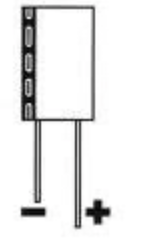

In [86]:
imagen = Image.open(imagenes[0])
imagen

In [87]:
a,b=imagen.size

if a!=b: #Si no coincide el ancho/largo
  if a>b:
    im = Image.new('RGB', (a, a), (255, 255, 255))
    im.paste(imagen, (0,0))
  else:
    im = Image.new('RGB', (b, b), (255, 255, 255))
    im.paste(imagen, (0,0))
imagen = im

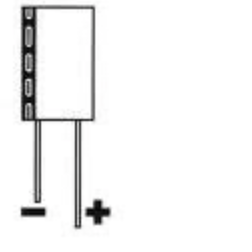

In [88]:
imagen

In [89]:
imagen.size

(252, 252)

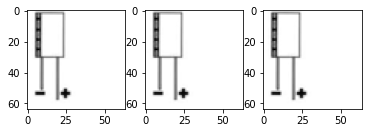

In [90]:
imagen  = imagen.resize((64,64))  #Escalar, 64 x 64 en ejemplo

#Antes del resize realizar un fill de blanco :D

 #Ilustración de las 3 capas a usar
imagen2 = np.array(imagen)
imagen2.shape
imagen2=imagen2.transpose( 2,0,1 )

fig1 = plt.figure(figsize=(6,10))
ax   = fig1.add_subplot(1,3,1)
ax.imshow(imagen2[0],cmap='gray')
ax   = fig1.add_subplot(1,3,2)
ax.imshow(imagen2[1],cmap='gray')
ax   = fig1.add_subplot(1,3,3)
ax.imshow(imagen2[2],cmap='gray')

In [ ]:
#Limpieza del directorio por si hubo algo antes de preprocesar:
try:
  rmtree( dir +'DataPrep')
except FileNotFoundError:
  print('nada que borrar')

nada que borrar


#### Función de Carga, Preprocesado y Guardado de Datos


In [93]:
#función para preprocesar datos:
def PreprocesarDatos(resize,tipo,dispositivos):
  """
  el tamaño deseado,
  tipo ingresado
  la lista de dispositivos a revisar (la lista de las clases es diferente!!!)
  """

  #Este proceso se debe repetir para cada tipo

  os.chdir(dir) # Carpeta superior 
  #Preparamos sitios de almacenamiento

  try:
    os.chdir( dir+'DataPrep/')  
  except FileNotFoundError:
    os.mkdir( dir+'DataPrep/')
    os.chdir( dir+'DataPrep/')
  
  try:
    os.chdir( dir+'DataPrep/'+tipo)  
  except FileNotFoundError:
    os.mkdir( dir+'DataPrep/'+tipo)
    os.chdir( dir+'DataPrep/'+tipo)
  
  for dispositivo in dispositivos:
    #Por cada tipo realizaremos el número de carpeta correspondiente
    try:
      os.chdir( dir+'DataPrep/'+tipo+'/'+dispositivo)  
    except FileNotFoundError:
      os.mkdir( dir+'DataPrep/'+tipo+'/'+dispositivo)
      os.chdir( dir+'DataPrep/'+tipo+'/'+dispositivo)
    #Con la carpeta destino creada nos movemos a la ubicación de las imagenes

    os.chdir(dir+'Data/'+tipo+'/'+dispositivo) #Se supone existe
    print('Actualmente en: ',tipo+', '+dispositivo)
    
    imagenes = os.listdir()
  
    #Acumuladores de datos procesados
    x_v=[]
    y_v=[]
    for imagenName in imagenes:
  
      imagen  = Image.open(imagenName)
      imagen = imagen.convert('RGB') #Todo a RGB
      
      a,b=imagen.size
      if a!=b: #Si no coincide el ancho/largo
        if a>b:
          #nuevo fondo
          im = Image.new('RGB', (a, a), (255, 255, 255)) 
          im.paste(imagen, (0,0))
        else:
          #nuevo fondo
          im = Image.new('RGB', (b, b), (255, 255, 255))
          im.paste(imagen, (0,0))
      
      imagen = im.resize((resize,resize))  #Escalar
      imagen = np.array(imagen)
      imagen = imagen/255 #Normalizado
    
      #Revisar que todas las imagenes cumplan*
      x_v.append(imagen)

    y_v.append(dispositivo)
    y_v=y_v*len(x_v) #Número de veces que se debe repetir el target
    x_v=np.array(x_v)
    y_v=np.array(y_v)
  
    #Esto se puede hacer con un with
    os.chdir(dir +'DataPrep/'+tipo+'/'+dispositivo) 
    pickle.dump(x_v, open(dispositivo+"Data", 'wb'))
    pickle.dump(y_v, open(dispositivo+"Target", 'wb'))
    #Regresamos al directorio donde se encuentran el resto, mejorar con with




In [94]:
#Implementación de la función anterior
PreprocesarDatos(32,listaDeEntradas[0],listaDeDispositivosEsquematicos) #Preprocesa Esquematicos
PreprocesarDatos(32,listaDeEntradas[1],listaDeDispositivosComponentes)  #Preprocesa Componentes


Actualmente en:  Esquematicos, Capacitores-Electroliticos
Actualmente en:  Esquematicos, LED
Actualmente en:  Esquematicos, Fusibles
Actualmente en:  Esquematicos, Resistencias
Actualmente en:  Esquematicos, Bobinas
Actualmente en:  Esquematicos, Potenciometros
Actualmente en:  Esquematicos, Diodos
Actualmente en:  Esquematicos, LCD
Actualmente en:  Esquematicos, Ventiladores
Actualmente en:  Esquematicos, Motores
Actualmente en:  Esquematicos, Capacitores-Ceramicos
Actualmente en:  Esquematicos, Bocinas
Actualmente en:  Esquematicos, Circuitos Integrados
Actualmente en:  Esquematicos, Transistores
Actualmente en:  Esquematicos, PushButtons
Actualmente en:  Esquematicos, DipSwitches
Actualmente en:  Esquematicos, Baterias
Actualmente en:  Esquematicos, Conectores
Actualmente en:  Componentes, Capacitores-Electroliticos


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Actualmente en:  Componentes, LED
Actualmente en:  Componentes, Fusibles


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Actualmente en:  Componentes, Resistencias
Actualmente en:  Componentes, Bobinas
Actualmente en:  Componentes, Potenciometros
Actualmente en:  Componentes, Diodos
Actualmente en:  Componentes, LCD
Actualmente en:  Componentes, Ventiladores
Actualmente en:  Componentes, Motores
Actualmente en:  Componentes, Capacitores-Ceramicos
Actualmente en:  Componentes, Bocinas
Actualmente en:  Componentes, Circuitos Integrados
Actualmente en:  Componentes, Transistores
Actualmente en:  Componentes, PushButtons
Actualmente en:  Componentes, DipSwitches
Actualmente en:  Componentes, Baterias
Actualmente en:  Componentes, Conectores


In [95]:
dir+'/DataPrep'

'/content/ProyectoCircuitos-ANN//DataPrep'

In [96]:
path=os.getcwd()

In [97]:
!zip -r file.zip /content/ProyectoCircuitos-ANN/DataPrep 

updating: content/ProyectoCircuitos-ANN/DataPrep/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematicos/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematicos/Capacitores-Electroliticos/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematicos/Capacitores-Electroliticos/Capacitores-ElectroliticosData (deflated 95%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematicos/Capacitores-Electroliticos/Capacitores-ElectroliticosTarget (deflated 89%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematicos/LED/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematicos/LED/LEDTarget (deflated 67%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematicos/LED/LEDData (deflated 94%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematicos/Fusibles/ (stored 0%)
updating: content/ProyectoCircuitos-ANN/DataPrep/Esquematicos/Fusibles/FusiblesTarget (deflated 80%)
updating: content/ProyectoCircuitos-ANN/DataP

In [98]:
#Descarga del FOLDER con modificaciones
files.download("file.zip") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Función de Carga de datos Preprocesados

In [ ]:
def CargadorDatos(dirOrigen, n,personajes):
  #Se elige directorio origen y número de personajes
  x_v =[]
  y_v =[]
  i = 0 #indice de personaje
  t = 0 #total de personajes agregados
  while t < n:
  
    personaje = personajes[i]
    os.chdir(dirOrigen+'/'+personaje)

    #cargar todo  con 64x64 

    #LOAD 
    data = pickle.load(open(personaje+'Data','rb')) 
    
    #If a implementar para regular que personajes pueden ser cargados
    # 0 -> todos serán considerados
    # 
    if(len(data)>0):    
      t=t+1
      x_v.extend( data )
      y_v.extend( pickle.load( open(personaje+'Target','rb'))  )
    i=i+1 
  return np.array(x_v) , np.array(y_v)

In [ ]:
#implementación de la función anterior


In [ ]:
#Forma de los datos